Our dataset is a group of about 3300 computer parts, such as keyboards, mice, wires, ram chips, motherboards, etc. The purpose of this data is for machines to be able to identify different parts based on a new picture of them. Many third parties would be interested in this, such as machines that are attempting to build PCs and need to utilize cameras to locate certain parts for removal or insertion. Ensuring accuracy is crucial here, as failure to do so will hinder these machines from effectively carrying out their tasks. Thus, the prediction algorithm needs to be very effective in order for this to work to be useful to these third parties. This includes, for example, correctly identifying a keyboard versus a RAM chip, so that it does not choose the wrong item or damage any components.

Another use for our classifier is to sort scrap components from actual usable parts when recycling computers, as well as to remove any toxic parts from going to the landfill. For example, before trash goes into a land fill a camera would scan for certain parts.


## Using PCA with sklearn
Let's use PCA to find the two "best" dimensions of this data
These are linear transforms to help project the features into something more understandable

In [77]:
import seaborn as sns
from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# cmap = sns.set(style="darkgrid") 

# # this function definition just formats the weights into readable strings
# # you can skip it without loss of generality to the Data Science content
# def get_feature_names_from_weights(weights, names):
#     tmp_array = []
#     for comp in weights:
#         tmp_string = ''
#         for fidx,f in enumerate(names):
#             if fidx>0 and comp[fidx]>=0:
#                 tmp_string+='+'
#             tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
#         tmp_array.append(tmp_string)
#     return tmp_array
  
# plt.style.use('default')
# now let's get to the Data Analytics!
# pca_weight_strings = get_feature_names_from_weights(pca.components_, iris.feature_names) 

# create some pandas dataframes from the transformed outputs
# df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

from matplotlib.pyplot import scatter

# scatter plot the output, with the names created from the weights
# ax = scatter(X_pca[:,0], X_pca[:,1], c=y, s=(y+2)*10, cmap=cmap)
# plt.xlabel(pca_weight_strings[0]) 
# plt.ylabel(pca_weight_strings[1])


## Biplots 
Biplots are visualizations that allow you to see how much of each principle component is represented by each feature. They are used many times in survey data results to display the responses of multiple survey questions. An example biplots used in this fashion is available here: https://datasciencebe.files.wordpress.com/2015/03/pca-skillscores.png

In [78]:
# Manipulated example from https://github.com/teddyroland/python-biplot/blob/master/biplot.py

def biplot(pca, dat, title=''):
    
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    # 0,1 denote PC1 and PC2; change values for other PCs
    xvector = pca.components_[0] 
    yvector = pca.components_[1]

    tmp = pca.transform(dat.values)
    xs = tmp[:,0] 
    ys = tmp[:,1]

    annotations = [Scatter(x=xs, y=ys, mode ='markers',
                           marker=Marker(color=iris.target),
                           name='PCA Trans. Data')]
    for i in range(len(xvector)):
        txt = list(dat.columns.values)[i]
        annotations.append(
                Scatter( 
                    x=[0, xvector[i]*2],#*max(xs)
                    y=[0, yvector[i]*2],#*max(ys)
                    mode='lines+text',
                    text=['', txt],
                    name=txt,
                ))
    
    plotly.offline.iplot({
        "data": annotations,
        "layout": Layout(xaxis=XAxis(title='Principal Component One'), 
                         yaxis=YAxis(title='Principal Component Two'),
                        title=title)
    })


    plt.show()
    
# X = iris.data
# pca = PCA(n_components=2)
# pca.fit(X) 
# biplot(pca,pd.DataFrame(iris.data,columns=iris.feature_names),'Iris Biplot')
# print ('pca:\n', pca.components_)
# print(iris.feature_names)

## Explained Variance
Recall that the explained variance is a factor of the eigen values. We can access these via the following equation:

$$ r_q=\frac{\sum_{j=1}^q \lambda_j}{\sum_{\forall i} \lambda_i} $$

In [79]:
# manipulated from Sebastian Raschka Example (your book!)
# also from hi blog here: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

# this is a scree plot
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

# pca = PCA(n_components=4)
# X_pca = pca.fit(X)
# plot_explained_variance(pca)
# plt.show()

# PCA With Image Data
This is code manipulated from Olivier Grisel's eigen face classification demonstration. You can find the original notebook here: http://nbviewer.ipython.org/github/ogrisel/notebooks/blob/master/Labeled%20Faces%20in%20the%20Wild%20recognition.ipynb

In [80]:
import os
import cv2
import numpy as np

# Define your data directory containing subfolders (class labels)
data_dir = './pc_parts'

# Initialize lists to store data and labels
image_data = []
labels = []

# Traverse subfolders
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            imgg = cv2.resize(img, (128, 128))
            gray_image = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
            image_data.append(np.ravel(gray_image))
            labels.append(class_name)

# Convert lists to NumPy arrays
X = np.array(image_data)
y = np.array(labels)
names=list(set(labels))
label = {item:i + 1 for i, item in enumerate(names)}


# Print shapes for verification
print("x_train shape:", X.shape)  # (num_images, height, width, channels)
print("y_train shape:", y.shape)  # (num_images,)



x_train shape: (1183, 16384)
y_train shape: (1183,)


In [82]:
n_samples, n_features = X.shape
n_classes = len(names)

h,w=128,128
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes 128 by 128")

n_samples: 1183
n_features: 16384
n_classes: 8
Original Image Sizes 128 by 128


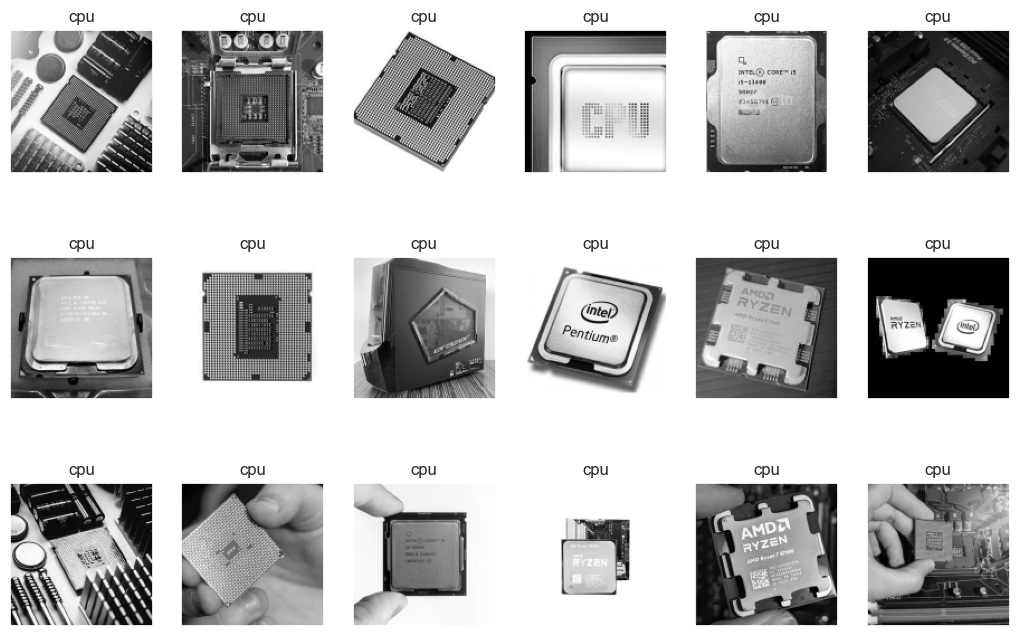

In [83]:
# a helper plotting function
from matplotlib import pyplot as plt


def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, y, h, w) # defaults to showing a 3 by 6 subset of the faces

## Reconstruct Using Full PCA


In [84]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

n_components = 1000
print ("Extracting the top %d eigenfaces from %d photos" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 1000 eigenfaces from 1183 photos
CPU times: total: 1min 50s
Wall time: 19.7 s


In [85]:
plot_explained_variance(pca)

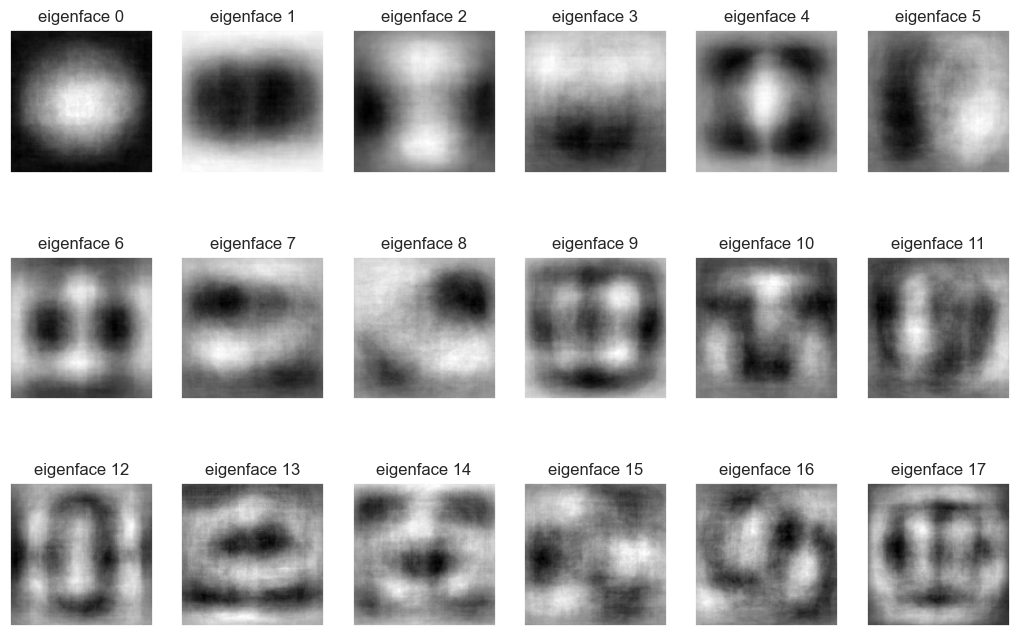

In [86]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

In [87]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 1    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

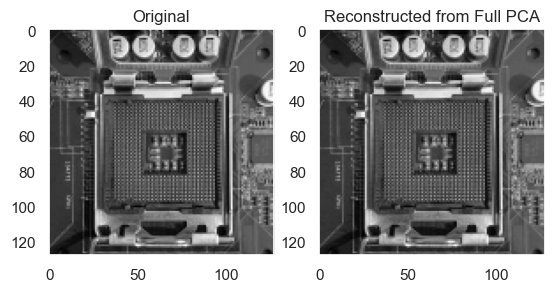

In [88]:
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid(False)

## Now Let's Use Randomized PCA
Of course, the methods that are used to calculate eigenvectors (the components) do not scale well with the number of features (in this case, the image dimensions). Recall that PCA works on the covariance matrix and the covariance matrix size is not affected by the number of examples, only the number of features. Randomized PCA helps to mitigate this by formulating the eigenvectors of a lower rank matrix using randomized projections. 

More information here: 
- http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- ftp://ftp.math.ucla.edu/pub/camreport/cam08-60.pdf
- Halko, et al., 2009 (arXiv:909) A randomized algorithm for the decomposition of matrices Per-Gunnar Martinsson, Vladimir Rokhlin and Mark Tygert

In [89]:
# lets do some PCA of the features and go from 1850 features to 300 features

n_components = 1000
print ("Extracting the top %d eigenimages from %d photos" % (
    n_components, X.shape[0]))

rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(X.copy())
eigenimages = rpca.components_.reshape((n_components, h, w))
plot_explained_variance(rpca)

Extracting the top 1000 eigenimages from 1183 photos
CPU times: total: 1min 4s
Wall time: 9.82 s


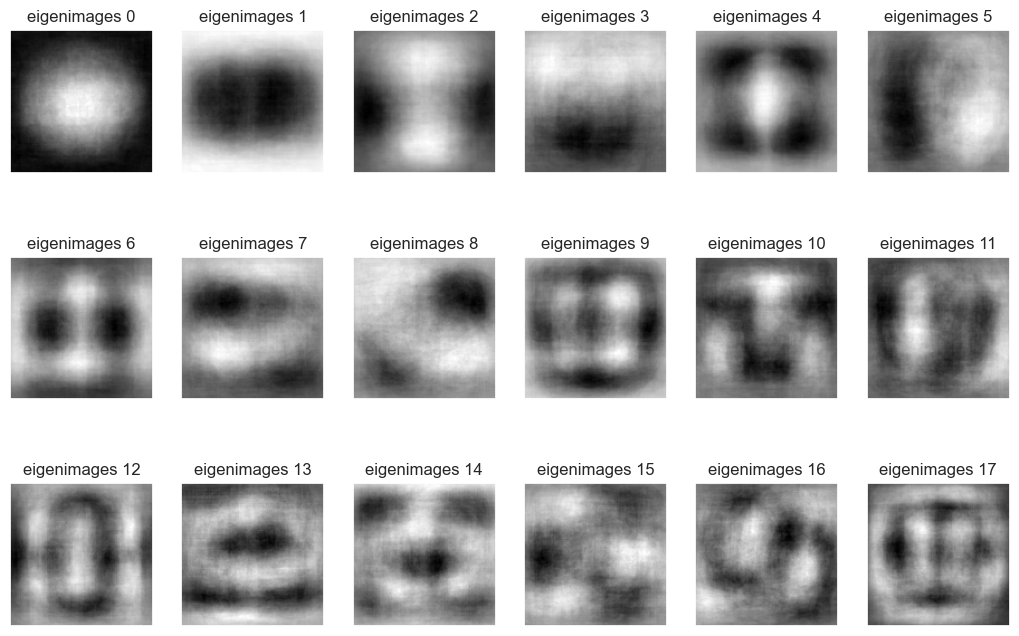

In [90]:
eigenimage_titles = ["eigenimages %d" % i for i in range(eigenimages.shape[0])]
plot_gallery(eigenimages, eigenimage_titles, h, w)

In [91]:
# widgets example
from ipywidgets import widgets  # make this interactive!

# widgets.interact(lambda x: print(x),x=(0,5,1))

In [92]:
import warnings
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)



def plt_reconstruct(idx_to_reconstruct):
    # this code is for reference only, it does not qualify as a neaarest neighbor search
    #  for your lab project. 
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    x_flat = X[idx_to_reconstruct].reshape(1, -1)
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat.copy()))    
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat.copy()))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1) # original
    plt.imshow(x_flat.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(y[idx_to_reconstruct]+f", {x_flat.shape[1]} elements")
    plt.grid(False)
    
    plt.subplot(1,3,2) # pca
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Full PCA, {n_components} elements")
    plt.grid(False)
    
    plt.subplot(1,3,3) # randomized pca
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Randomized PCA, {n_components} elements")
    plt.grid(False)
    plt.show()
    
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

interactive(children=(IntSlider(value=591, description='idx_to_reconstruct', max=1182), Output()), _dom_classe…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

## PCA For Image Classification

In [93]:
from ipywidgets import fixed
import copy

from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features

X_pca_features = rpca.transform(copy.deepcopy(X))
dist_matrix_pca = pairwise_distances(copy.deepcopy(X_pca_features),
                                     metric="seuclidean")

                                       
# put it together inside a nice widget
def closest_image(dmat_pca, idx1):
    
    # NOTE: this will NOT suffice for evaluation of a nearest neighbor classifier for your lab assignment
    distances = copy.deepcopy(dmat_pca[idx1,:]) # get all image distances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances) #pca
    
    distances[idx2] = np.infty # dont pick the same image!
    idx3 = np.argmin(distances) # pixels
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    plt.imshow(X[idx1].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Original:"+y[idx1])
    plt.grid(False)

    plt.subplot(1,3,2)
    plt.imshow(X[idx2].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Closest:"+y[idx2])
    plt.grid(False)
    
    plt.subplot(1,3,3)
    plt.imshow(X[idx3].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Next Closest:"+y[idx3])
    plt.grid(False)
    plt.show()
    
widgets.interact(closest_image,idx1=(0,n_samples-1,1),
                 dmat_pca=fixed(dist_matrix_pca),
                 __manual=True)

interactive(children=(IntSlider(value=591, description='idx1', max=1182), Output()), _dom_classes=('widget-int…

<function __main__.closest_image(dmat_pca, idx1)>

____
# Image Processing Crash Course
Now let's look at other Methods for extracting features from images.

Let's start by calculating gradients:

c:\Users\jadon\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:162: UserWarning:

The figure layout has changed to tight



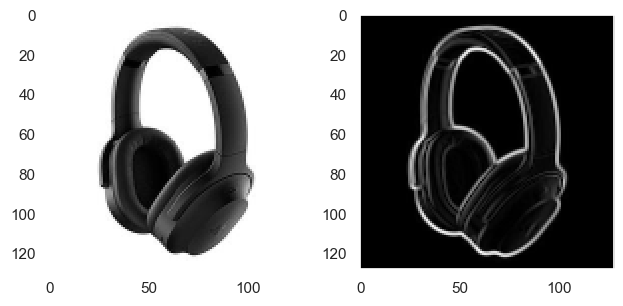

In [94]:
from skimage.io import imshow
from skimage.filters import sobel_h, sobel_v

plt.subplot(1,2,1)
idx_to_reconstruct = int(np.random.rand(1)*len(X))
img  = X[idx_to_reconstruct].reshape((h,w))
imshow(img)
plt.grid(False)


plt.subplot(1,2,2)
gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
imshow(gradient_mag)
plt.grid(False)
plt.show()

## Image Feature: DAISY Bag of Features Model
As discussed in lecture, DAISY Features are a means of looking at histograms of edges weights using gradients at various orientations (if you are new to this, that is not a satisfying explanation, please look back at the notes/slides for the course.). 

http://scikit-image.org/docs/dev/_images/sphx_glr_plot_daisy_001.png

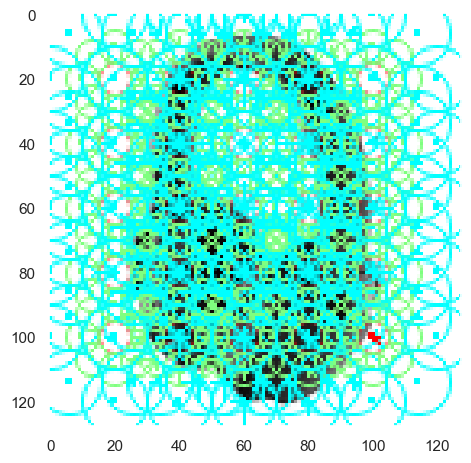

In [95]:
from skimage.feature import daisy

# lets first visualize what the daisy descriptor looks like
features, img_desc = daisy(img, 
                           step=20, 
                           radius=20, 
                           rings=2, 
                           histograms=8, 
                           orientations=8, 
                           visualize=True)
imshow(img_desc)
plt.grid(False)
plt.show()

In [96]:
# now let's understand how to use it
features = daisy(img, step=10, radius=20, rings=2, histograms=8, orientations=4, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(9, 9, 68)
5508


In [97]:
# create a function to take in the row of the matrix and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=10, radius=20, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(h,w))
test_feature.shape

CPU times: total: 31.2 ms
Wall time: 30.8 ms


(5508,)

In [98]:
0.026 * len(X) # approximate how long it may run

30.758

In [99]:
# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)

CPU times: total: 14.3 s
Wall time: 14.6 s
(1183, 5508)


In [100]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time
dist_matrix = pairwise_distances(daisy_features)

CPU times: total: 0 ns
Wall time: 0 ns


c:\Users\jadon\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:162: UserWarning:

The figure layout has changed to tight



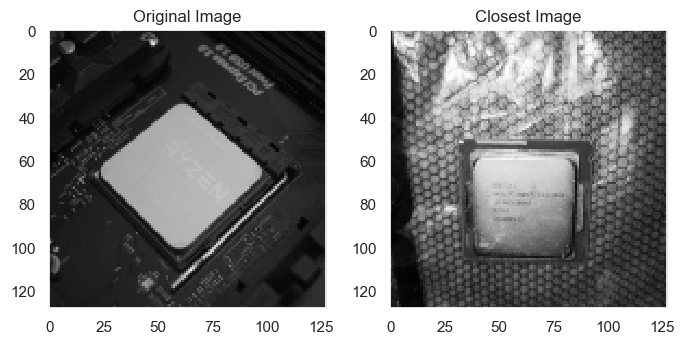

In [101]:
import copy
# find closest image to current image
idx1 = 5
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((h,w)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((h,w)))
plt.title("Closest Image")
plt.grid()

In [104]:
from ipywidgets import fixed
# put it together inside a nice widget
def closest_image(dmat_daisy, dmat_pca, idx1):
    # NOTE: this will not suffice for evaluation 
    # of a nearest neighbor classifier for your lab assignment
    # do not use this code for satifying the lab assignment requirement
    
    distances = copy.deepcopy(dmat_daisy[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances = copy.deepcopy(dmat_pca[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    imshow(X[idx1].reshape((h,w)))
    plt.title("Original: "+y[idx1])
    plt.grid()

    plt.subplot(1,3,2)
    imshow(X[idx2].reshape((h,w)))
    plt.title("DAISY Closest: "+y[idx2])
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(X[idx3].reshape((h,w)))
    plt.title("PCA Closest: "+y[idx3])
    plt.grid()
    
widgets.interact(closest_image,idx1=(0,n_samples-1,1),
                 dmat_daisy=fixed(dist_matrix),
                 dmat_pca=fixed(dist_matrix_pca),
                 __manual=True)

interactive(children=(IntSlider(value=591, description='idx1', max=1182), Output()), _dom_classes=('widget-int…

<function __main__.closest_image(dmat_daisy, dmat_pca, idx1)>

In [ ]:
pca_obj = PCA(n_components=300)
X_pca_features = pca_obj.fit_transform(X)

## Bonus: K-Nearest Neighbor Classification with each Feature Space

You can skip this if you want, it's only for an intuition about how it works
Let's try getting a more quantitative measure of performance by using a sklearn classifier for each feature space.

In [ ]:
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# init a classifier for each feature space
knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_dsy = KNeighborsClassifier(n_neighbors=1)

# separate the data into train/test
pca_train, pca_test, dsy_train, dsy_test, y_train, y_test = train_test_split(
    X_pca_features,daisy_features, y, test_size=0.2, train_size=0.8)

# fit each classifier
knn_pca.fit(pca_train,y_train)
acc_pca = accuracy_score(knn_pca.predict(pca_test),y_test)

knn_dsy.fit(dsy_train,y_train)
acc_dsy = accuracy_score(knn_dsy.predict(dsy_test),y_test)

# report accuracy
print(f"PCA accuracy:{100*acc_pca:.2f}%, Daisy Accuracy:{100*acc_dsy:.2f}%".format())

PCA accuracy:37.97%, Daisy Accuracy:49.37%


## In this notebook you learned:

- Principle Components Analisys 
- Randomized PCA
- Image Features (like Daisy)
- Classifying Images with Nearest Neighbor Distance
 - Using both quantitative and qualitative methods 
- BONUS Content in this Notebook: 
 - Matching techniques 
 - Gabor Filters as a Feature 
 - Kernel PCA



In [ ]:
# for the exceptional credit, you might be interested in the following code
# you will need to repeat this for all pairs of images in the testing and training 
from skimage.feature import match_descriptors

def apply_daisy(row,shape): # no reshape in this function
    feat = daisy(row.reshape(shape), step=5, radius=5, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    s = feat.shape # PxQxR
    #P = ceil((Height - radius*2) / step) 
    #Q = ceil((Width - radius*2) / step) 
    #R = (rings * histograms + 1) * orientations
    return feat.reshape((s[0]*s[1],s[2]))

d1 = apply_daisy(X[10],(h,w))
d2 = apply_daisy(X[11],(h,w))
d3 = apply_daisy(X[0],(h,w))

print(d1.shape, d2.shape, d3.shape)
print('Classes:',y[10],y[11],y[0])

# return list of the key points indices that matched closely enough
matches = match_descriptors(d1, d2, cross_check=True, max_ratio=0.8)
print(f"Number of matches, same class: {matches.shape[0]}, Percentage:{100*matches.shape[0]/len(d1):0.2f}%")

# return list of the key points indices that matched closely enough
matches = match_descriptors(d1, d3, cross_check=True, max_ratio=0.8)
print(f"Number of matches, diff classes: {matches.shape[0]}, Percentage:{100*matches.shape[0]/len(d1):0.2f}%")

(576, 68) (576, 68) (576, 68)
Classes: cpu cpu cpu
Number of matches, same class: 20, Percentage:3.47%
Number of matches, diff classes: 18, Percentage:3.12%


____
____
____

## Gabor Kernels for Feature Extraction [if time]

We do not typically cover this in class, but students are welcome to look at this additional feature space. 

In [ ]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from scipy import stats

# prepare filter bank kernels
kernels = []
for theta in range(8):# orientations
    theta = theta / 8. * np.pi
    for sigma in (1, 3, 5): # std
        for frequency in (0.05, 0.15, 0.25, 0.35): # frequency
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

            
# compute the filter bank and take statistics of image
# this can be drastically sped up using the 2D FFT
def compute_gabor(row, kernels, shape):
    feats = np.zeros((len(kernels), 4), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(row.reshape(shape), kernel, mode='wrap')
        _,_,feats[k,0],feats[k,1],feats[k,2],feats[k,3] = stats.describe(filtered.reshape(-1))
        # mean, var, skew, kurt
        
    return feats.reshape(-1)

idx_to_reconstruct = int(np.random.rand(1)*len(X))

gabr_feature = compute_gabor(X[idx_to_reconstruct], kernels, (h,w))
gabr_feature.shape

(384,)